<h1 align=center><font size=5>Sentiment Analysis of IMDB Movie Reviews</font></h1>

### Table of contents

- [Data](#data)
- [ANN](#ann)
- [CNN](#cnn)
- [LSTM](#lstm)
- [Bidirectional LSTM ](#bilstm)
- [CNN LSTM](#cnnlstm)

### Data <a id="data"></a>

#### About IMDB movie reviews

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words". As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

#### Loading IMDB dataset

&#x270d; Loading IMDB moview reviews dataset in keras with having the top 5,000 most common words.

In [0]:
from keras.datasets import imdb

vocab_size = 5000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words= vocab_size)

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

25000 train sequences
25000 test sequences


&#x270d; Have a look at a sample of dataset. What are your observations?

In [0]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


&#x270d; Converting the integers back to words

In [0]:
word_index = imdb.get_word_index() 

INDEX_FROM = 3
word_index = {key:(value+INDEX_FROM) for key,value in word_index.items()}
word_index["<PAD>"] = 0    # the padding token
word_index["<START>"] = 1  # the starting token
word_index["<UNK>"] = 2    # the unknown token

reverse_word_index = {value:key for key, value in word_index.items()} 

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(X_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly <UNK> was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little <UNK> that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big <UNK> for the whole film but these children are amazing and should be <UNK> for what the

#### Truncating and padding the data.

&#x270d; Truncate and pad the review sequences with maximum length of all review sequences to be 500.

In [0]:
X_train.shape

(25000,)

In [0]:
len(max(X_train,key=lambda i: len(i)))

2494

In [0]:
from keras.preprocessing.sequence import pad_sequences

max_length = 500 # maximum length of all review sequences

X_train = pad_sequences(X_train, value = word_index["<PAD>"], padding='post', maxlen= max_length)
X_test = pad_sequences(X_test, value = word_index["<PAD>"], padding = 'post', maxlen=max_length)

print('X_train shape:', X_train.shape) # (n_samples, sequence_length)
print('X_test shape:', X_test.shape)

X_train shape: (25000, 500)
X_test shape: (25000, 500)


&#x270d; Observing the sample of dataset.

In [0]:
print(X_train[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
    2   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117    2   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194    2   18    4  226   22   21  134  476
   26  480    5  144   30    2   18   51   36   28  224   92   25  104
    4 

###  ANN <a id="ann"></a>

&#x270d; Creating the model.

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

embedding_dim = 16

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Flatten())

model.add(Dense(units =16, activation ='relu'))

model.add(Dense(units =1, activation ='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                128016    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 208,033
Trainable params: 208,033
Non-trainable params: 0
_________________________________________________________________


&#x270d; Compile and train the model. Considering 10% of training set for validation purpose.

In [0]:
model.compile(loss='binary_crossentropy' ,
              optimizer='adam' ,
              metrics=['accuracy'] )

batch_size = 32
epochs = 10

history = model.fit(X_train, y_train, batch_size= batch_size, epochs= epochs, validation_split=0.1)  

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 4s 186us/step - loss: 0.5052 - acc: 0.7081 - val_loss: 0.3215 - val_acc: 0.8704
Epoch 2/10
22500/22500 [==============================] - 4s 166us/step - loss: 0.2127 - acc: 0.9182 - val_loss: 0.3368 - val_acc: 0.8700
Epoch 3/10
22500/22500 [==============================] - 4s 166us/step - loss: 0.0856 - acc: 0.9734 - val_loss: 0.3992 - val_acc: 0.8604
Epoch 4/10
22500/22500 [==============================] - 4s 172us/step - loss: 0.0249 - acc: 0.9951 - val_loss: 0.5080 - val_acc: 0.8572
Epoch 5/10
22500/22500 [==============================] - 4s 174us/step - loss: 0.0068 - acc: 0.9994 - val_loss: 0.5960 - val_acc: 0.8648
Epoch 6/10
22500/22500 [==============================] - 4s 178us/step - loss: 0.0022 - acc: 0.9999 - val_loss: 0.6545 - val_acc: 0.8604
Epoch 7/10
22500/22500 [==============================] - 4s 174us/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.6940 - v

&#x270d; Evaluate the model over test set.

In [0]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 1s 38us/step
Test score: 0.8137125681567192
Test accuracy: 0.84716


&#x270d; Plotting loss and accuracy metrics versus training epochs for both training and validation sets.

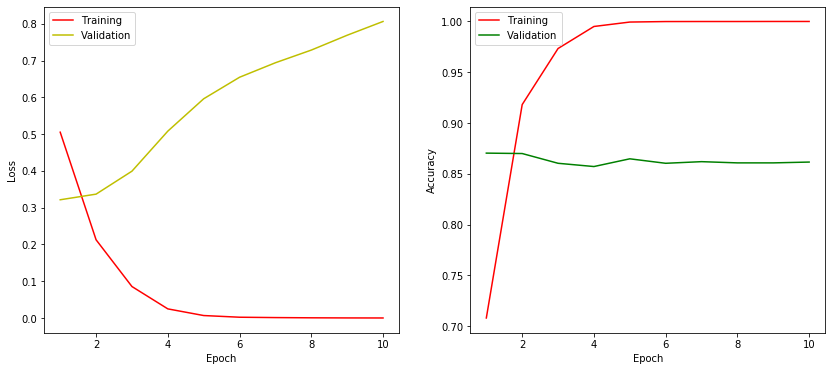

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_model(history):
    loss_train = history.history['loss']
    loss_vald = history.history['val_loss']
    acc_train = history.history['acc']
    acc_vald = history.history['val_acc']

    epochs = range(1, len(loss_train)+1)


    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.plot(epochs,loss_train, 'r')
    plt.plot(epochs, loss_vald, 'y')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='best')

    plt.subplot(1,2,2)
    plt.plot(epochs, acc_train, 'r')
    plt.plot(epochs, acc_vald, 'g')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='best')
    plt.show()


plot_model(history)

&#x270d; Retrieve the learned embeddings.

1. Retrieve the word embeddings learned during training.

In [0]:
embedding_layer = model.layers[0]

weights = embedding_layer.get_weights()[0]

print(weights.shape) # (vocab_size, embedding_dim)

(5000, 16)


2. Write the weights to disk containing the following files:
    - a file of vectors (containing the embedding), 
    - a file of meta data (containing the words).

In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding = 'utf-8')
out_m = io.open('meta.tsv', 'w', encoding = 'utf-8')

for word_num in range(4, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + '\n')
    out_v.write('\t'.join([str(x) for x in embeddings]) + '\n')
out_v.close()
out_m.close()

3. Visualizing the embeddings
    - Open the [Embedding Projector](http://projector.tensorflow.org);
    - Clicking on "Load data";
    - And uploading the two files we created above: vecs.tsv and meta.tsv.

###  CNN <a id="cnn"></a>

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense

embedding_dim = 16

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Dropout(0.2))
model.add(Conv1D(filters =128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 128)          10368     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 32
epochs = 4

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)         

Train on 22500 samples, validate on 2500 samples
Epoch 1/4
22500/22500 [==============================] - 33s 1ms/step - loss: 0.4735 - acc: 0.7483 - val_loss: 0.3252 - val_acc: 0.8656
Epoch 2/4
22500/22500 [==============================] - 32s 1ms/step - loss: 0.2674 - acc: 0.8900 - val_loss: 0.2680 - val_acc: 0.8968
Epoch 3/4
22500/22500 [==============================] - 32s 1ms/step - loss: 0.2062 - acc: 0.9180 - val_loss: 0.2711 - val_acc: 0.8944
Epoch 4/4
22500/22500 [==============================] - 32s 1ms/step - loss: 0.1671 - acc: 0.9378 - val_loss: 0.2733 - val_acc: 0.8964


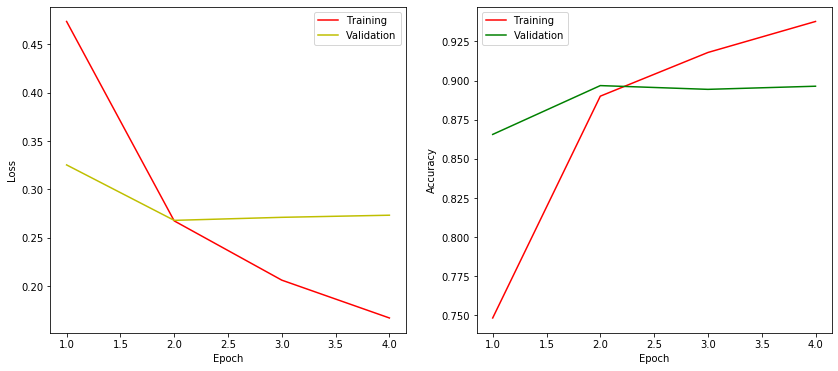

In [0]:
plot_model(history)

In [0]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 8s 309us/step
Test score: 0.2705240497159958
Test accuracy: 0.8938


###  LSTM <a id="lstm"></a>

In [0]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length, mask_zero=True))
#model.add(Dropout(0.2))
model.add(LSTM(4, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 336       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 80,341
Trainable params: 80,341
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
batch_size= 32
epochs =10

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 254s 11ms/step - loss: 0.5897 - acc: 0.7246 - val_loss: 0.5238 - val_acc: 0.7884
Epoch 2/10
22500/22500 [==============================] - 256s 11ms/step - loss: 0.4519 - acc: 0.8076 - val_loss: 0.4584 - val_acc: 0.7936
Epoch 3/10
22500/22500 [==============================] - 250s 11ms/step - loss: 0.3908 - acc: 0.8328 - val_loss: 0.4104 - val_acc: 0.8164
Epoch 4/10
22500/22500 [==============================] - 248s 11ms/step - loss: 0.3625 - acc: 0.8480 - val_loss: 0.4210 - val_acc: 0.8064
Epoch 5/10
22500/22500 [==============================] - 236s 11ms/step - loss: 0.3352 - acc: 0.8640 - val_loss: 0.4169 - val_acc: 0.8160
Epoch 6/10
22500/22500 [==============================] - 233s 10ms/step - loss: 0.3248 - acc: 0.8664 - val_loss: 0.4153 - val_acc: 0.8080
Epoch 7/10
22500/22500 [==============================] - 235s 10ms/step - loss: 0.3038 - acc: 0.8767 - val_loss: 0.4

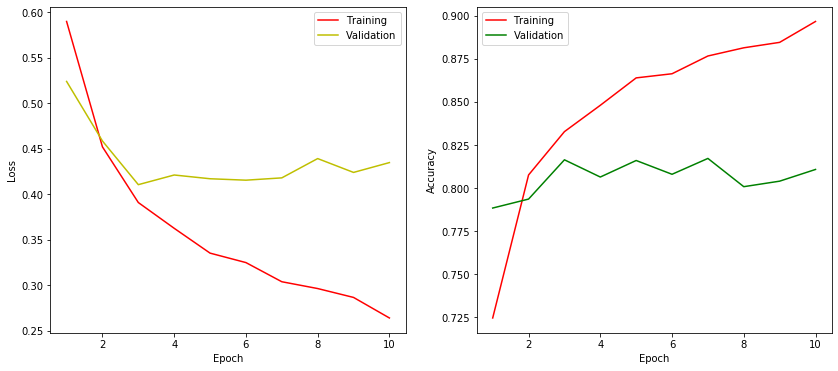

In [0]:
plot_model(history)

In [0]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 29s 1ms/step
Test score: 0.42113648288726807
Test accuracy: 0.81792


### Bidirectional LSTM <a name="bilstm"></a>

In [0]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
#model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 16)           80000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               41472     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 121,601
Trainable params: 121,601
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
batch_size= 32
epochs = 5
history = model.fit(X_train, y_train, batch_size= batch_size, epochs=epochs, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 350s 16ms/step - loss: 0.6548 - acc: 0.6264 - val_loss: 0.6908 - val_acc: 0.4936
Epoch 2/5
22500/22500 [==============================] - 346s 15ms/step - loss: 0.6790 - acc: 0.5667 - val_loss: 0.6237 - val_acc: 0.7060
Epoch 3/5
22500/22500 [==============================] - 348s 15ms/step - loss: 0.5902 - acc: 0.6856 - val_loss: 0.4773 - val_acc: 0.7832
Epoch 4/5
22500/22500 [==============================] - 349s 16ms/step - loss: 0.5419 - acc: 0.7395 - val_loss: 0.4907 - val_acc: 0.7892
Epoch 5/5
22500/22500 [==============================] - 346s 15ms/step - loss: 0.4356 - acc: 0.8133 - val_loss: 0.5749 - val_acc: 0.6912


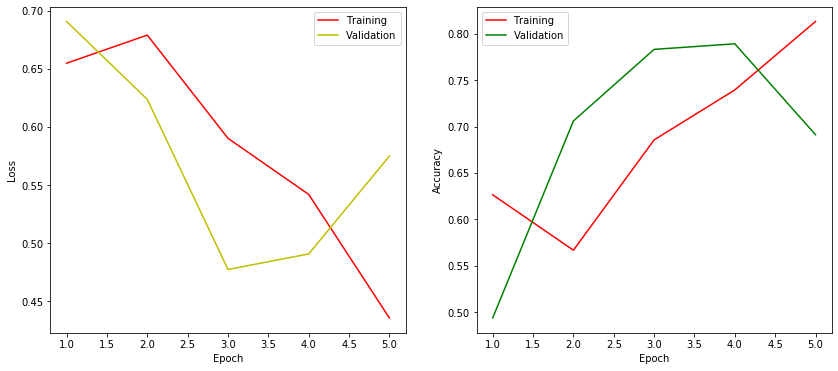

In [0]:
plot_model(history)

In [0]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 60s 2ms/step
Test score: 0.5828552572059631
Test accuracy: 0.68512


### CNN LSTM <a name="cnnlstm"></a>

In [0]:
from keras.layers import MaxPooling1D, Activation

model=Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Dropout(0.25))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(70))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 500, 16)           80000     
_________________________________________________________________
dropout_8 (Dropout)          (None, 500, 16)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 496, 64)           5184      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 124, 64)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 71        
Total params: 123,055
Trainable params: 123,055
Non-trainable params: 0
______________________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size=32
epochs=5

history = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 88s 4ms/step - loss: 0.6918 - acc: 0.5105 - val_loss: 0.6972 - val_acc: 0.5248
Epoch 2/5
22500/22500 [==============================] - 88s 4ms/step - loss: 0.6668 - acc: 0.5711 - val_loss: 0.5932 - val_acc: 0.7388
Epoch 3/5
22500/22500 [==============================] - 86s 4ms/step - loss: 0.5219 - acc: 0.7114 - val_loss: 0.3426 - val_acc: 0.8540
Epoch 4/5
22500/22500 [==============================] - 88s 4ms/step - loss: 0.2957 - acc: 0.8818 - val_loss: 0.2993 - val_acc: 0.8720
Epoch 5/5
22500/22500 [==============================] - 89s 4ms/step - loss: 0.2348 - acc: 0.9101 - val_loss: 0.2832 - val_acc: 0.8804


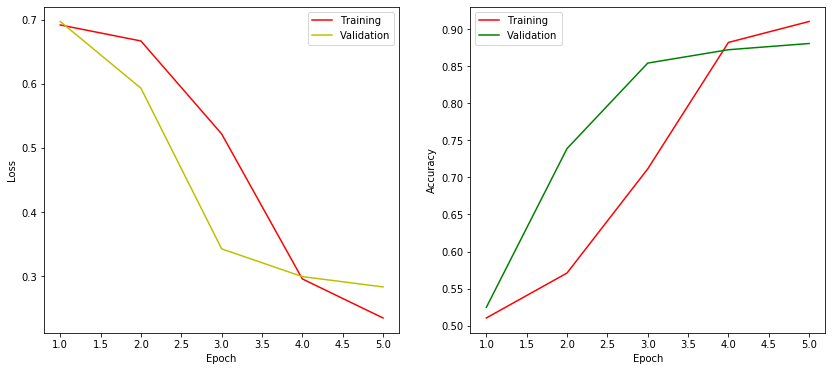

In [0]:
plot_model(history)

In [0]:
score, acc = model.evaluate(X_test, y_test)
print('Test score:', score)
print('Test accuracy:', acc)

25000/25000 [==============================] - 20s 782us/step
Test score: 0.28147302247524264
Test accuracy: 0.88288
